In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [2]:
dataset_path = 'perceptron/dataset_LP_1.txt' # dataset_LP_2.csv

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

y[y == 0] = -1

In [5]:
X.shape

(1372, 4)

In [6]:
def hpad_ones(X):
    padding = np.ones((X.shape[0], 1))
    X = np.hstack((padding, X))
    
    return X

In [7]:
# Padding with Ones to add bias term
X = hpad_ones(X)

In [8]:
X.shape, y.shape

((1372, 5), (1372,))

In [9]:
X[0].shape

(5,)

In [10]:
def classify(x, w):
    return 1 if w.T @ x > 0 else -1

In [11]:
def get_weight(n):
#     return np.random.randn(n, 1)
    return np.ones((n, 1))

In [12]:
def sgd(w, X, y, learning_rate=0.1, epochs=10):
    accuracy = []
    for i in tqdm(range(epochs)):
        for x, t in zip(X, y):
            acc = test(w, X, y)
            accuracy.append(acc)
            
            # if acc > .9:
            #    return w, accuracy
            
            if (t * classify(x, w) < 0):
                w += learning_rate * t * x.reshape(-1, 1)
                
    
        # Calculate Accuracy
        accuracy.append(test(w, X, y))
        
    plt.plot(accuracy)            
    return w, accuracy

In [13]:
def test(w, X, y):
    incorrect = 0
    correct = 0
    
    for x, t in zip(X, y):
        if (t * classify(x, w) < 0):
            incorrect += 1
        else:
            correct += 1

    # Calculate Accuracy
    acc = correct / (correct + incorrect)
    
    return acc

In [14]:
w = get_weight(X.shape[1])
test(w, X, y)

0.1552478134110787

100%|██████████| 10/10 [01:00<00:00,  6.05s/it]


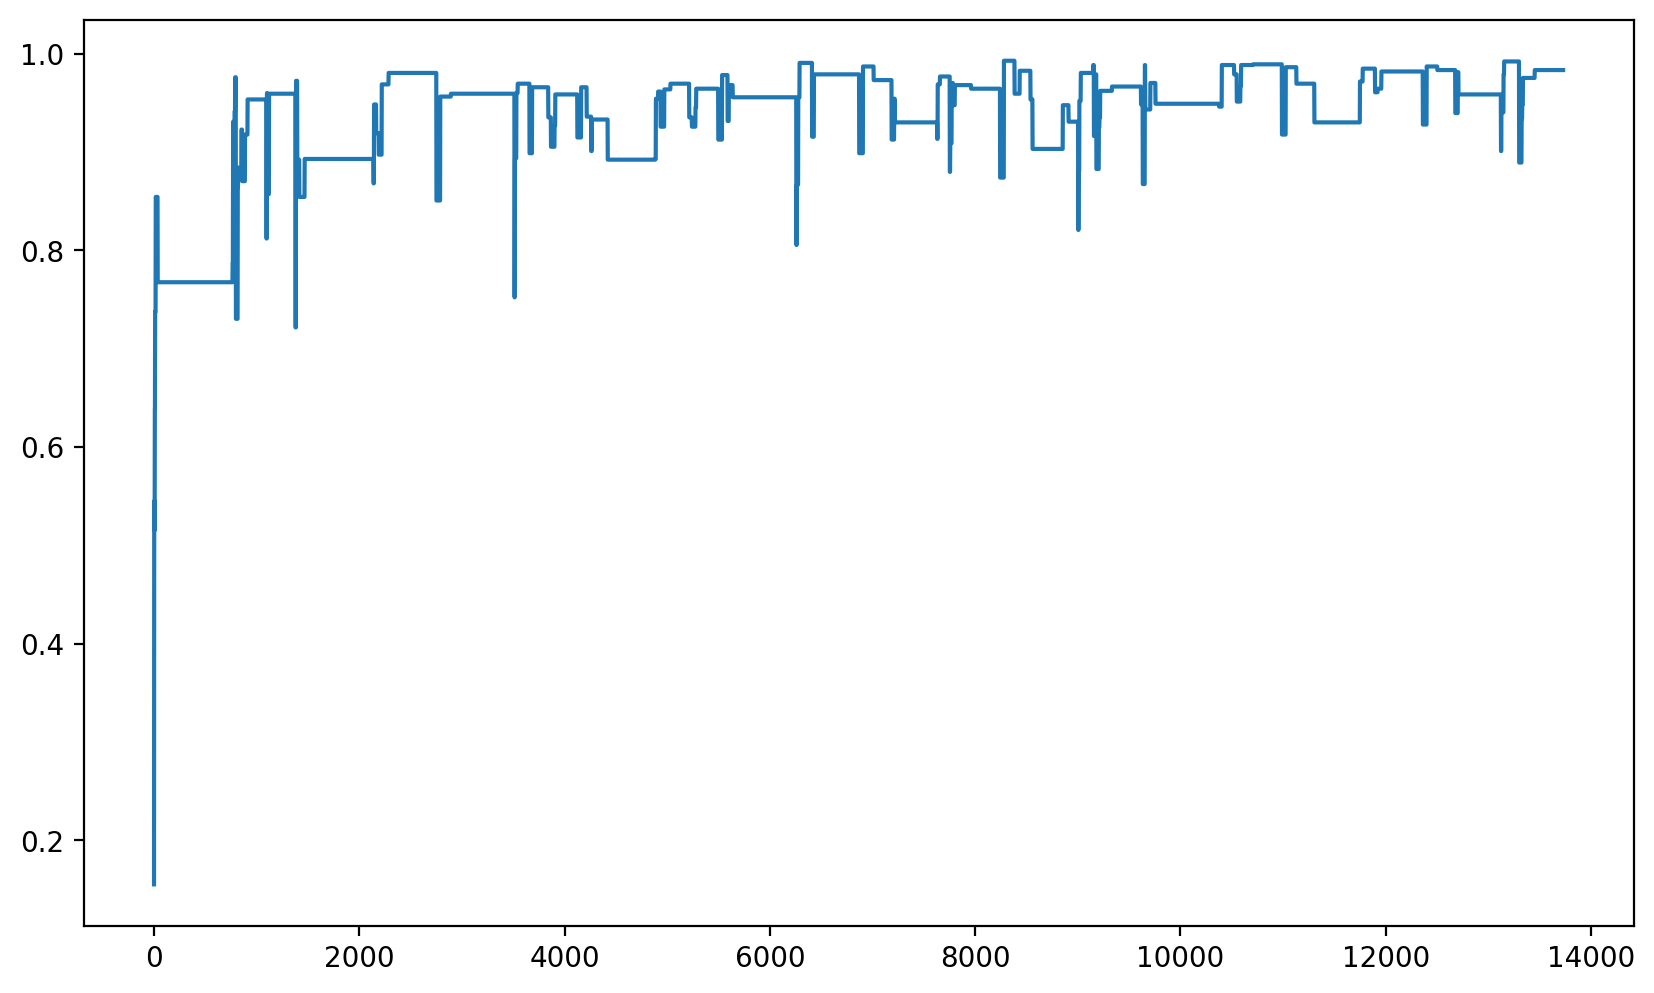

In [15]:
w, accuracy = sgd(w, X, y)

In [16]:
test(w, X, y)

0.9832361516034985